# Data Wrangling WeRateDogs Project


In [2]:
import pandas as pd
import requests
import numpy as np
import json
import tweepy
import datetime
from timeit import default_timer as timer
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS


## 1. Gathering Data

##### a.) WeRateDogs Twitter Archive

In [2]:
#gathering twitter data
df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### b.) Tweet Image Predictions

In [5]:
#Using the Requests library, downloading the tweet image predictions
response=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_predictions.tsv','wb') as file:
    file.write(response.content)
    

# Read in tsv file as a Pandas DataFrame    
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### c.)  Twitter API

In [8]:
access_token= "103873525-lRvChOu5HH2E263xXCjQlZDja5hoNiF3IyyIVtap"
access_secret= "ppfbYybP2RYRSF4FKoDz1OqKXNalPeqZsC6VrySz3N4Tn"
consumer_key ="WmXKHYZFhcNMIra8UQ5WnhxWt"
consumer_secret = "34Iub6OaHj1V06OEOqIzp9Fc1ZhJ1g2zNANWY4DNwmCMBqqKF1"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [8]:
tweet_id = df['tweet_id']


In [9]:
tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [11]:
#tweet_id found are appended to df_twitter
df_twitter = []
# tweet_id not found are appended to list2
list2 = []

for id in tweet_id:
    try:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_twitter.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception as e:
        list2.append(id)

892420643555336193 36063 7677
892177421306343426 31104 5678
891815181378084864 23418 3763
891689557279858688 39336 7851
891327558926688256 37579 8449
891087950875897856 18938 2835
890971913173991426 11010 1844
890729181411237888 60744 17133
890609185150312448 26047 3901
890240255349198849 29780 6660
890006608113172480 28666 6650
889880896479866881 26075 4531
889665388333682689 44888 9082
889638837579907072 25268 4069
889531135344209921 14152 2048
889278841981685760 23551 4847
888917238123831296 27178 4083
888804989199671297 23882 3851
888554962724278272 18432 3164
888078434458587136 20350 3150
887705289381826560 28264 4897
887517139158093824 43335 10703
887473957103951883 64227 16342
887343217045368832 31451 9520
887101392804085760 28613 5419
886983233522544640 32618 6963
886736880519319552 11198 2922
886680336477933568 21002 4068
886366144734445568 19750 2879
886267009285017600 111 4
886258384151887873 26151 5739
886054160059072513 0 100
885984800019947520 30437 6103
88552894320547020

In [12]:
df_twitter[:5]

[{'tweet_id': 892420643555336193, 'favorites': 36063, 'retweet_count': 7677},
 {'tweet_id': 892177421306343426, 'favorites': 31104, 'retweet_count': 5678},
 {'tweet_id': 891815181378084864, 'favorites': 23418, 'retweet_count': 3763},
 {'tweet_id': 891689557279858688, 'favorites': 39336, 'retweet_count': 7851},
 {'tweet_id': 891327558926688256, 'favorites': 37579, 'retweet_count': 8449}]

In [13]:
list2

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [14]:
jsontweet_df = pd.DataFrame(df_twitter, columns = ['tweet_id', 'favorites', 'retweet_count'])


In [15]:
jsontweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2331 non-null   int64
 1   favorites      2331 non-null   int64
 2   retweet_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [16]:
#saving copy of json data to txt 
jsontweet_df.to_csv('tweet_json.txt',encoding='utf-8',index=False)

In [9]:
jsontweet_df=pd.read_csv('tweet_json.txt')

In [10]:
jsontweet_df.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,36063,7677
1,892177421306343426,31104,5678
2,891815181378084864,23418,3763
3,891689557279858688,39336,7851
4,891327558926688256,37579,8449


In [11]:
jsontweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2331 non-null   int64
 1   favorites      2331 non-null   int64
 2   retweet_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


## 2. Assessing Data

We want only originial ratings excluding the retweets that have images

####         a.) Visualising the data using excel

During gathering stage, each of the three datasets were opened in excel as the dataset is considerably smaller and can be easily opened in excel.

####         b.) Visualising the data using pandas

During gathering stage, using df.head() , df.tail() , df.sample() , df['column_name'].value_counts() , df['column_name'].describe() and df.info() were used to get the essence of the data.

Some of the issues which i find out were,



### Quality Issues ( Dirty data)

This issues comprises of Completeness, Validity, Accuracy and Consistency

- Removing the retweets data i.e. 181 <br>
- Removing the replies i.e. 78 and also which don't have image <br>
- Above can be said , as calculated above the twitter data has 2356 rows and image_predictions_df has 2075.<br>
- column related to retweets should be dropped like "retweeted_status_id","retweeted_status_user_id" and 	"retweeted_status_timestamp", "in_reply_to_status_id" and "in_reply_to_user_id".<br>
- Dogs have name 'a' which seem to be incorrect.<br>
- timestamp should be converted into datetime.<br>
- Many of the other columns are also not in their perfect datatype<br>
- Correcting the rating_numerator for some rows <br>



### Tidiness (structural issues)

- doggo,floofer,pupper,puppo can be made into 1 column using melt.<br>
- The image_predictions_df had 3 predictions, its better that we take the best prediction and reduce the size of final dataframe.
- Make a single dataframe from the three tables


## 3. Cleaning Data

In [13]:
#Making a copy of all the dataframes
twitter_clean=df.copy()
image_clean=image_predictions_df.copy()
json_clean=jsontweet_df.copy()

- *Merging all the dataframes into one*


In [14]:
#joining the three dataframes on common twitter_id
df1= pd.merge(twitter_clean, json_clean, on=['tweet_id','tweet_id'],how='left')
final_df=pd.merge(df1,image_clean,on=['tweet_id','tweet_id'],how='left')

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [35]:
#SAVING the final df into csv
final_df.to_csv('WeRateDogDataset.csv',encoding='utf-8',index=False)

In [16]:
final_df=pd.read_csv('WeRateDogDataset.csv')

In [17]:
def funt(df):
    leng=df.shape[0]
    count=0
    for i in range(0,leng):
        if(df['doggo'].loc[i]=='None' and df['floofer'].loc[i]=='None' and df['pupper'].loc[i]=='None' and df['puppo'].loc[i]=='None'):
            count=count+1
    return count

a=funt(final_df)
a
#checking if any twitter id hasn't has more than one dog breed 

1976

In [18]:
#finding retweets
len(df['retweeted_status_timestamp'])-sum(df['retweeted_status_timestamp'].isnull())

181

In [19]:
#finding no. of replies
len(df['in_reply_to_status_id'])-sum(df['in_reply_to_status_id'].isnull())

78

- *Removing the tweets which are replies or are retweets and also which don't have any image*

In [20]:
final_df=final_df[final_df['retweeted_status_id'].isnull()]
final_df=final_df[final_df['in_reply_to_status_id'].isnull()]

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [22]:
sum(final_df['jpg_url'].isnull())

126

In [23]:
final_df=final_df[final_df['jpg_url'].notnull()]

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

In [25]:
final_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1437,697242256848379904,NaN,NaN,2016-02-10 02:14:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has a massive tumor growing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697242256...,...,1.0,grey_fox,0.236031,False,Siamese_cat,0.165791,False,Eskimo_dog,0.063533,True
396,825147591692263424,NaN,NaN,2017-01-28 01:04:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sweet Pea. She hides in shoe boxes and...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825147591...,...,1.0,Pekinese,0.354823,True,Pomeranian,0.245390,True,toy_poodle,0.136545,True
2119,670417414769758208,NaN,NaN,2015-11-28 01:42:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sharp dog here. Introverted. Loves purple. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670417414...,...,1.0,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False
1778,677895101218201600,NaN,NaN,2015-12-18 16:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this was terrifying. Really spooked me up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677895101...,...,1.0,dalmatian,0.550702,True,kuvasz,0.060226,True,Great_Pyrenees,0.058631,True
1816,676606785097199616,NaN,NaN,2015-12-15 03:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*screeches for a sec and then faints* 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676606785...,...,1.0,Loafer,0.202999,False,doormat,0.200411,False,malinois,0.142300,True


- *Delete the rows related to retweets and replies*

In [26]:
final_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

In [27]:
final_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- *doggo,floofer,pupper,puppo can be made into 1 column using melt*

In [28]:
final1=final_df.copy()

In [29]:
final1=pd.melt(final1,id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls','rating_numerator', 'rating_denominator', 
                          'name','favorites', 'retweet_count', 'jpg_url', 'img_num','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 
                          'p2_dog', 'p3', 'p3_conf','p3_dog'],value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],var_name='type',value_name='type_of_dog')

In [30]:
final1.type_of_dog.value_counts()


None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: type_of_dog, dtype: int64

In [31]:
final1.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type,type_of_dog
3459,675531475945709568,2015-12-12 04:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,1154.0,370.0,...,0.918441,True,Cardigan,0.027339,True,Siberian_husky,0.020221,True,floofer,None
3433,676470639084101634,2015-12-14 18:35:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Three generations of pupper. 11/10 for all htt...,https://twitter.com/dog_rates/status/676470639...,11,10,None,11324.0,4562.0,...,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False,floofer,None


In [32]:
final1 =final1.sort_values('type_of_dog').drop_duplicates('tweet_id', keep = 'last')
#final1.drop('type_of_dog',axis=1,inplace=True)

In [33]:
final1.type_of_dog.value_counts()

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: type_of_dog, dtype: int64

In [34]:
final_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [35]:
final2=final1.copy()


*There were 10 less dogs after dropping duplicates and i found out that 14 rows had more than 1 type_of_dog, So manually checked for it from final_df and changed the values*

In [36]:
final2.loc[final2.tweet_id == 817777686764523521, 'type_of_dog'] = 'doggo'
final2.loc[final2.tweet_id == 808106460588765185, 'type_of_dog'] = 'None'
final2.loc[final2.tweet_id == 801115127852503040, 'type_of_dog'] = 'doggo'
final2.loc[final2.tweet_id == 785639753186217984, 'type_of_dog'] = 'doggo'
final2.loc[final2.tweet_id == 759793422261743616, 'type_of_dog'] = 'None'
final2.loc[final2.tweet_id == 751583847268179968, 'type_of_dog'] = 'None'
final2.loc[final2.tweet_id == 741067306818797568, 'type_of_dog'] = 'None'
final2.loc[final2.tweet_id == 733109485275860992, 'type_of_dog'] = 'None'

In [37]:
final2.type_of_dog.value_counts()

None       1673
pupper      201
doggo        66
puppo        23
floofer       8
Name: type_of_dog, dtype: int64

In [38]:
final2.drop('type',axis=1,inplace=True)

In [39]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorites           1964 non-null   float64
 9   retweet_count       1964 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

- *The image_predictions_df had 3 predictions, its better that we take the best prediction and reduce the size of final dataframe.*

In [40]:
#checking if the 1st prediction has higher confidence or not 
sum(final2['p1_conf']>final2['p2_conf'])

1971

In [41]:
sum(final2['p2_conf']>final2['p3_conf'])

df3=final2.copy()
#pd.set_option("display.max_rows",100)


In [42]:
#making a new column which takes the actual value and the prediction value 
df3.rename(columns={'p1':'dog_breed','p1_conf':'confidence'},inplace=True)

In [43]:
#now we can drop from p2 to p3
df3.drop(['p1_dog','p2','p3','p2_conf','p2_dog','p3_conf','p3_dog'],axis=1,inplace=True)

In [44]:
df3.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,dog_breed,confidence,type_of_dog
2297,819588359383371776,2017-01-12 16:54:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jazzy. She just found out that sandwic...,https://twitter.com/dog_rates/status/819588359...,13,10,Jazzy,9736.0,2011.0,https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg,1.0,Cardigan,0.547935,None
3724,670086499208155136,2015-11-27 03:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hi yes this is dog. I can't help with that s-...",https://twitter.com/dog_rates/status/670086499...,10,10,None,671.0,243.0,https://pbs.twimg.com/media/CUygHhFXAAAwNXv.jpg,1.0,German_short-haired_pointer,0.273492,None


In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorites           1964 non-null   float64
 9   retweet_count       1964 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  dog_breed           1971 non-null   object 
 13  confidence          1971 non-null   float64
 14  type_of_dog         1971 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 246

- *Dogs have name 'a' which seem to be incorrect.*

In [46]:
final_df['name'].value_counts()

None       524
a           55
Charlie     11
Lucy        10
Cooper      10
          ... 
Howie        1
Lambeau      1
Strudel      1
Taco         1
Corey        1
Name: name, Length: 935, dtype: int64

In [47]:
final_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [53]:
#we can see that the name starting with small letters are wrong , so we can make then none values
df4=df3.copy()

In [54]:
name=[]
def funct(df_row):
    if(df_row['name'].islower()==True):
        name.append('None')
    else:
        name.append(df_row['name'])
        
df4.apply(funct,axis=1)

1895    None
1894    None
1893    None
1892    None
1891    None
        ... 
6046    None
6390    None
6588    None
6443    None
6618    None
Length: 1971, dtype: object

In [55]:
df4['name']=name

In [51]:
list(df4.name)

['Biden',
 'None',
 'None',
 'None',
 'Cupcake',
 'Reese',
 'None',
 'None',
 'Philippe',
 'Hall',
 'None',
 'Dook',
 'Fwed',
 'None',
 'Frank',
 'None',
 'Kial',
 'George',
 'None',
 'None',
 'Olive',
 'Calvin',
 'None',
 'None',
 'None',
 'None',
 'Naphaniel',
 'None',
 'Genevieve',
 'Joshwa',
 'None',
 'None',
 'Jockson',
 'Jeph',
 'None',
 'None',
 'None',
 'None',
 'Carll',
 'Klevin',
 'None',
 'Keet',
 'None',
 'Dave',
 'Clybe',
 'Gabe',
 'None',
 'Pipsy',
 'Bradlay',
 'Churlie',
 'Kenneth',
 'Clarence',
 'None',
 'None',
 'Timison',
 'None',
 'None',
 'Filup',
 'None',
 'None',
 'Shaggy',
 'Josep',
 'None',
 'Tedrick',
 'Stu',
 'Erik',
 'Cleopatricia',
 'None',
 'Otis',
 'Jiminy',
 'None',
 'Alfie',
 'None',
 'None',
 'Lugan',
 'None',
 'Christoper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Walter',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Scout',
 'Kr

In [56]:
df4['name'].value_counts()

None        622
Charlie      11
Lucy         10
Oliver       10
Cooper       10
           ... 
Zara          1
Jennifur      1
Franq         1
Andru         1
Laela         1
Name: name, Length: 913, dtype: int64

*timestamp should be converted into datetime and deleting +0000 at the last as it of of no use*

In [57]:
df5=df4.copy()
df5.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,dog_breed,confidence,type_of_dog
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,446.0,213.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,None


In [58]:
df5['timestamp']=df5['timestamp'].str[:-5]
pd.to_datetime(df5['timestamp'])

1895   2015-11-19 18:13:27
1894   2015-11-19 20:14:03
1893   2015-11-19 20:20:22
1892   2015-11-19 20:44:47
1891   2015-11-19 21:22:56
               ...        
6046   2017-05-03 03:17:27
6390   2016-10-25 16:00:09
6588   2016-07-21 23:53:04
6443   2016-09-28 00:46:20
6618   2016-07-07 19:16:47
Name: timestamp, Length: 1971, dtype: datetime64[ns]

In [59]:
df5.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,dog_breed,confidence,type_of_dog
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,446.0,213.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,None


In [60]:
df5=df5[df5['favorites'].notnull()]
df5=df5[df5['retweet_count'].notnull()]
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1964 non-null   int64  
 1   timestamp           1964 non-null   object 
 2   source              1964 non-null   object 
 3   text                1964 non-null   object 
 4   expanded_urls       1964 non-null   object 
 5   rating_numerator    1964 non-null   int64  
 6   rating_denominator  1964 non-null   int64  
 7   name                1964 non-null   object 
 8   favorites           1964 non-null   float64
 9   retweet_count       1964 non-null   float64
 10  jpg_url             1964 non-null   object 
 11  img_num             1964 non-null   float64
 12  dog_breed           1964 non-null   object 
 13  confidence          1964 non-null   float64
 14  type_of_dog         1964 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 245

*Many of the other columns are also not in their perfect datatype*

In [61]:
df6=df5.copy()

In [62]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1964 non-null   int64  
 1   timestamp           1964 non-null   object 
 2   source              1964 non-null   object 
 3   text                1964 non-null   object 
 4   expanded_urls       1964 non-null   object 
 5   rating_numerator    1964 non-null   int64  
 6   rating_denominator  1964 non-null   int64  
 7   name                1964 non-null   object 
 8   favorites           1964 non-null   float64
 9   retweet_count       1964 non-null   float64
 10  jpg_url             1964 non-null   object 
 11  img_num             1964 non-null   float64
 12  dog_breed           1964 non-null   object 
 13  confidence          1964 non-null   float64
 14  type_of_dog         1964 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 245

In [63]:
df6['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1926
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [64]:
df6['source']=df6['source'].astype('category')
#as can be seen above it is a categorical variable

In [65]:
df6['rating_numerator']=df6['rating_numerator'].astype('float')
df6['rating_denominator']=df6['rating_denominator'].astype('float')

#rating numerator should be float

In [66]:
df6['favorites']=df6['favorites'].astype('int64')
#it should be int

In [67]:
df6['retweet_count']=df6['retweet_count'].astype('int64')
#it should be int

In [68]:
df6['confidence'].unique()

array([0.381377, 0.999091, 0.989154, ..., 0.602957, 0.731564, 0.92939 ])

In [69]:
df6['confidence']=df6['confidence'].round(2)
#it can be converted to upto 2 decimal 

In [70]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1964 non-null   int64   
 1   timestamp           1964 non-null   object  
 2   source              1964 non-null   category
 3   text                1964 non-null   object  
 4   expanded_urls       1964 non-null   object  
 5   rating_numerator    1964 non-null   float64 
 6   rating_denominator  1964 non-null   float64 
 7   name                1964 non-null   object  
 8   favorites           1964 non-null   int64   
 9   retweet_count       1964 non-null   int64   
 10  jpg_url             1964 non-null   object  
 11  img_num             1964 non-null   float64 
 12  dog_breed           1964 non-null   object  
 13  confidence          1964 non-null   float64 
 14  type_of_dog         1964 non-null   object  
dtypes: category(1), float64(4), int64(3

In [10]:
pd.set_option('max_colwidth', -1)


<ipython-input-10-7020dba1819a>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


- *Correcting some of the rating_numerator*

In [76]:
df6[df6.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
#As it can be seen that some of the rating are wrong and it should be corrected

,text,rating_numerator
39,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
3330,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0
2470,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
4491,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0


In [159]:
#changing the value according to correct values mentioned in the text

In [77]:
df6.at[39,'rating_numerator']=13.5
df6.at[3330,'rating_numerator']=11.26
df6.at[2470,'rating_numerator']=9.75
df6.at[4491,'rating_numerator']=11.27

In [78]:
df6.rename(columns={"rating_numerator":"rating","rating_denominator":"out of"},inplace=True)
#renaming the variable to ratings


In [79]:
df6.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating,out of,name,favorites,retweet_count,jpg_url,img_num,dog_breed,confidence,type_of_dog
3750,669573570759163904,2015-11-25 17:49:14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Linda. She just looked up and saw you glancing at your neighboring classmate's test. 10/10 https://t.co/UpFFYhA1Id,https://twitter.com/dog_rates/status/669573570759163904/photo/1,10.0,10.0,Linda,422,132,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1.0,West_Highland_white_terrier,0.95,None
3004,705223444686888960,2016-03-03 02:49:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bode. He's a heavy sleeper. 9/10 https://t.co/YMkxhGWUqv,https://twitter.com/dog_rates/status/705223444686888960/photo/1,9.0,10.0,Bode,2569,794,https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg,1.0,Egyptian_cat,0.09,None
4642,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5.0,10.0,None,4391,1101,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1.0,dalmatian,0.87,None
2944,709852847387627521,2016-03-15 21:24:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*lets out a tiny whimper and then collapses* ...12/10 https://t.co/BNdVZEHRow,"https://twitter.com/dog_rates/status/709852847387627521/photo/1,https://twitter.com/dog_rates/status/709852847387627521/photo/1,https://twitter.com/dog_rates/status/709852847387627521/photo/1,https://twitter.com/dog_rates/status/709852847387627521/photo/1",12.0,10.0,None,3484,1191,https://pbs.twimg.com/media/CdnnZhhWAAEAoUc.jpg,2.0,Chihuahua,0.95,None
3367,678969228704284672,2015-12-21 16:04:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Lola. She's a Metamorphic Chartreuse. Plays with her food. Insubordinate and churlish. Exquisite hardwood 11/10 https://t.co/etpBNXwN7f,https://twitter.com/dog_rates/status/678969228704284672/photo/1,11.0,10.0,Lola,1626,452,https://pbs.twimg.com/media/CWwu6OLUkAEo3gq.jpg,1.0,Labrador_retriever,0.68,None


*So now we have our final data set which is ready for analysis*

In [80]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tweet_id       1964 non-null   int64   
 1   timestamp      1964 non-null   object  
 2   source         1964 non-null   category
 3   text           1964 non-null   object  
 4   expanded_urls  1964 non-null   object  
 5   rating         1964 non-null   float64 
 6   out of         1964 non-null   float64 
 7   name           1964 non-null   object  
 8   favorites      1964 non-null   int64   
 9   retweet_count  1964 non-null   int64   
 10  jpg_url        1964 non-null   object  
 11  img_num        1964 non-null   float64 
 12  dog_breed      1964 non-null   object  
 13  confidence     1964 non-null   float64 
 14  type_of_dog    1964 non-null   object  
dtypes: category(1), float64(4), int64(3), object(7)
memory usage: 232.2+ KB


In [81]:
df6.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating,out of,name,favorites,retweet_count,jpg_url,img_num,dog_breed,confidence,type_of_dog
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7.0,10.0,Biden,446,213,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.38,None
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12.0,10.0,None,294,81,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,1.00,None


Now we can save our data named as "twitter_archive_master.csv"

In [165]:
df6.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [3]:
df6=pd.read_csv('twitter_archive_master.csv')

## Analysing the Data

In [4]:
df6[['rating', 'retweet_count', 'favorites', 'confidence']].describe()


,rating,retweet_count,favorites,confidence
count,1964.000000,1964.000000,1964.000000,1964.000000
mean,12.178605,2463.076884,8291.319756,0.593977
std,41.681303,4399.429620,12188.803304,0.272261
min,0.000000,11.000000,70.000000,0.040000
25%,10.000000,549.500000,1781.000000,0.360000
50%,11.000000,1190.500000,3750.000000,0.590000
75%,12.000000,2813.750000,10345.750000,0.850000
max,1776.000000,77501.000000,155564.000000,1.000000


In [5]:
df6['dog_breed'].value_counts()

golden_retriever      137
Labrador_retriever     92
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
boathouse               1
shopping_basket         1
Japanese_spaniel        1
earthstar               1
loupe                   1
Name: dog_breed, Length: 373, dtype: int64

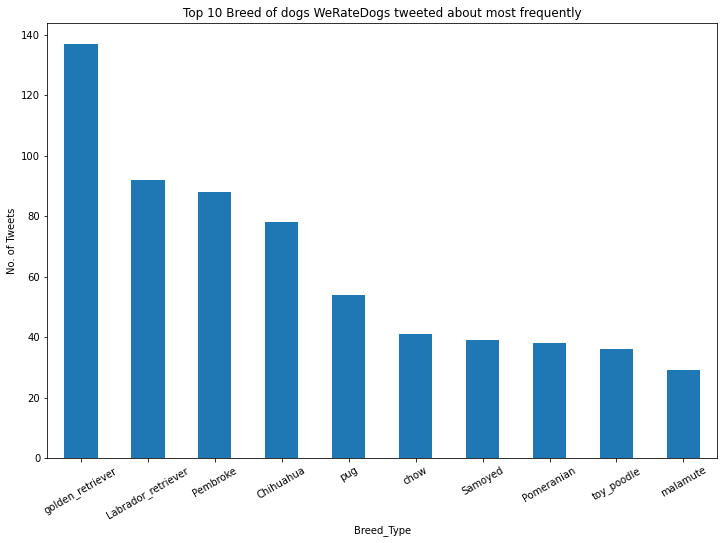

In [85]:
plt.figure(figsize=(12,8))

df6['dog_breed'].value_counts().nlargest(10).plot(kind='bar');
plt.xlabel('Breed_Type');
plt.ylabel('No. of Tweets');
plt.xticks(rotation=30);
plt.title('Top 10 Breed of dogs WeRateDogs tweeted about most frequently');

In [6]:
#Now analysing the ratings of top breeds
df6.groupby('dog_breed')['rating'].mean().nlargest(20)

dog_breed
bow_tie                        451.500000
microphone                     420.000000
lakeside                       108.000000
soft-coated_wheaten_terrier     26.700000
teddy                           18.588235
West_Highland_white_terrier     15.642857
Great_Pyrenees                  14.928571
borzoi                          14.625000
laptop                          14.000000
limousine                       14.000000
military_uniform                14.000000
pedestal                        14.000000
pole                            14.000000
prison                          14.000000
Labrador_retriever              13.956522
Siberian_husky                  13.250000
bakery                          13.000000
bannister                       13.000000
barbell                         13.000000
canoe                           13.000000
Name: rating, dtype: float64

In [11]:
df6.groupby('dog_breed')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Afghan_hound,3.0,9.666667,5.773503,3.0,8.00,13.0,13.00,13.0
African_crocodile,1.0,10.000000,NaN,10.0,10.00,10.0,10.00,10.0
African_grey,1.0,11.000000,NaN,11.0,11.00,11.0,11.00,11.0
African_hunting_dog,1.0,8.000000,NaN,8.0,8.00,8.0,8.00,8.0
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
...,...,...,...,...,...,...,...,...
wombat,4.0,9.250000,1.707825,7.0,8.50,9.5,10.25,11.0
wood_rabbit,3.0,10.666667,0.577350,10.0,10.50,11.0,11.00,11.0
wooden_spoon,1.0,12.000000,NaN,12.0,12.00,12.0,12.00,12.0


* As it can be seen there are many index which do not make any sense i.e. they don't belong to any dog_breed and hence we should take only the dog_breed which have ratings done more than 20 times <br>
* We should also eliminate the ratings which are >=15 as many have values greater than lets say 100 and goes upto 1000s hence we should neglect that

In [4]:
df7=df6.copy()
df7=df7[df7['rating']<15]
#removing outliers
df7=df7.groupby('dog_breed').filter(lambda x : len(x)>20)
#taking only breeds which were tweeted at least 20 times.

In [5]:
df7['rating'].describe()

count    744.000000
mean      11.111895
std        1.626040
min        2.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       14.000000
Name: rating, dtype: float64

Text(0.5, 1.0, 'Rating vs Count')

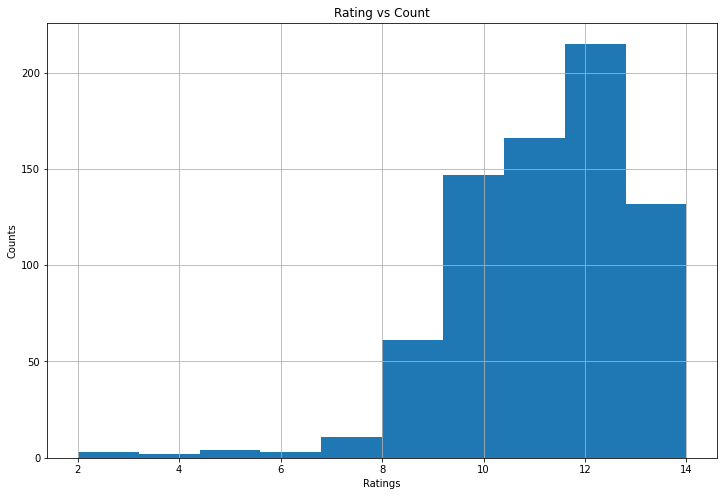

In [6]:
plt.figure(figsize=(12,8))
df7['rating'].hist()
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('Rating vs Count')

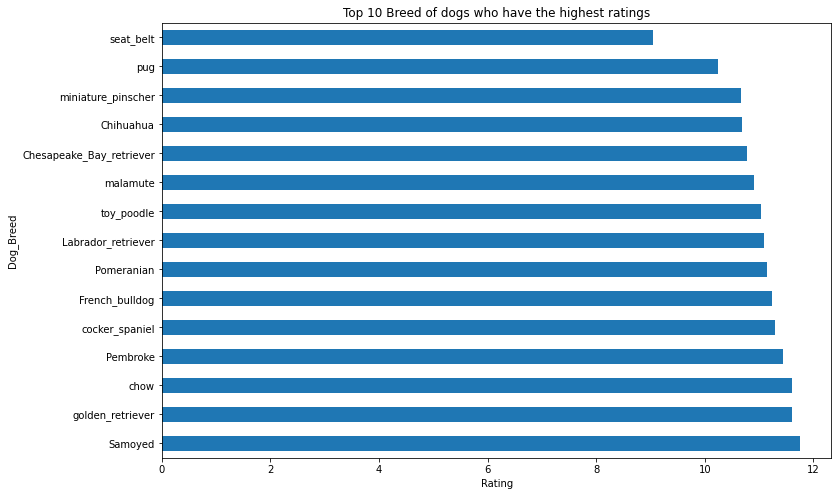

In [15]:
plt.figure(figsize=(12,8))
df7.groupby('dog_breed')['rating'].mean().nlargest(40).plot(kind='barh')
plt.ylabel('Dog_Breed')
plt.xlabel('Rating')
plt.title('Top 10 Breed of dogs who have the highest ratings');


### So the top breeds are Samoyed, chow and  golden_Retriever 

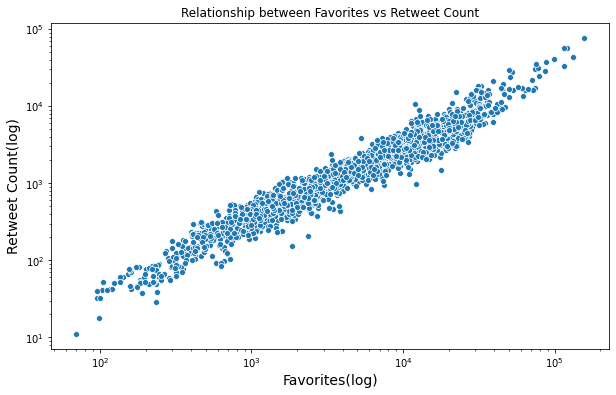

In [21]:
plt.figure(figsize=(10,6));
sns.scatterplot(data=df6,x='favorites',y='retweet_count');
plt.title('Relationship between Favorites vs Retweet Count');
plt.xlabel('Favorites(log)', fontsize = 14);
plt.ylabel('Retweet Count(log)', fontsize = 14);
#plt.colorbar()
plt.xscale('log')
plt.yscale('log')
#took from udacity visualisation class

*It can be seen that there is a direct relationship between favorites tweet and retweet count and it makes sense as well as a person who likes a tweets will have a higher chance to retweet that tweet*

#### Sources

- https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition <br>
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html <br>
- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id <br>
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.notnull.html <br>
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.islower.html <br>
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html <br>
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html<br>
